In [2]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats import chisquare
from scipy import stats

# import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain, repeat
import pickle
import re
from math import exp, log

# Set Seaborn style
sns.set(style="whitegrid")
plt.style.use("ggplot")
sns.set_context("talk")
%matplotlib inline

In [17]:
import altair as alt

### Load the results

In [3]:
#  Create a longform dataframe for plotting
def result2DataFrame(result):
    result_CoN = []
    result_gen = []
    # Find the number of families present
    families = list(result[0]['TEfamilyCN'].keys())
    # Create a new dictionary storing this information
    TEset = {}
    for i in families:
        TEset[i] = []
    for i in result:
        result_CoN_i = i['AvgCopyNum']
        result_gen_i = list(range(len(i['AvgCopyNum'])))
        result_CoN = result_CoN + result_CoN_i
        result_gen = result_gen + result_gen_i
        for key in TEset.keys():
            TEset[key] = TEset[key] + list(i['TEfamilyCN'][key])
    df = pd.DataFrame(list(zip(result_gen, result_CoN)), columns =['Generation', 'AverageCN'])
    for i in TEset.keys():
        df[i] = TEset[i]
    return (df)

In [4]:
# Load file from the pickle
# And calculate additional stats
fileName = "K3U05.pickle"
with open(fileName, "rb") as f:
    result_05 = pickle.load(f)
    result_05_DF = result2DataFrame(result_05)
fileName = "K3U02.pickle"
with open(fileName, "rb") as f:
    result_02 = pickle.load(f)
    result_02_DF = result2DataFrame(result_02)
fileName = "K3U0205.pickle"
with open(fileName, "rb") as f:
    result_0205 = pickle.load(f)
    result_0205_DF = result2DataFrame(result_0205)

In [5]:
# Create a master dataframe with labels
result_05_DF = result_05_DF[["Generation", "AverageCN"]]
result_02_DF = result_02_DF[["Generation", "AverageCN"]]
result_05_DF['U'] = "Ind_0.5"
result_02_DF['U'] = "Ind_0.2"

result_0205_02_DF = result_0205_DF[["Generation", 1]]
result_0205_02_DF['U'] = "Com_0.2"
result_0205_02_DF.columns = ["Generation", 'AverageCN', "U"]

result_0205_05_DF = result_0205_DF[["Generation", 2]]
result_0205_05_DF['U'] = "Com_0.5"
result_0205_05_DF.columns = ["Generation", 'AverageCN', "U"]

masterDF = result_05_DF.append([result_02_DF, result_0205_02_DF, result_0205_05_DF])

/home/siddharth/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/siddharth/miniforge3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Text(0.5, 0, 'Generation')

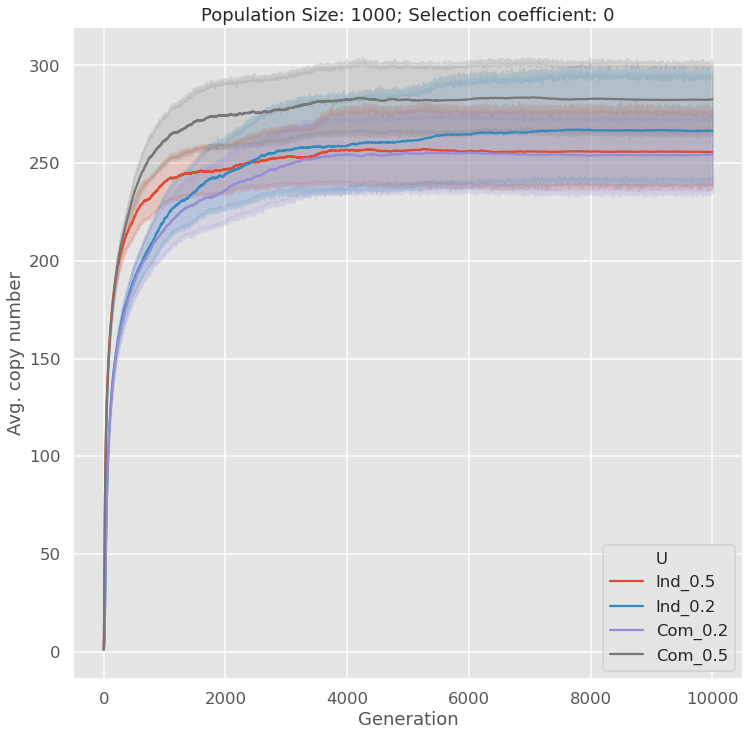

In [22]:
# Plot the average copy number
plt.figure(figsize=(12, 12))
f = sns.lineplot(
    x='Generation', y='AverageCN', hue="U", data=masterDF, estimator="median"
).set_title(
    "Population Size: 1000; Selection coefficient: 0"
)
plt.ylabel('Avg. copy number', fontsize=18)
plt.xlabel('Generation', fontsize=18)

Text(0.5, 0, 'Generation')

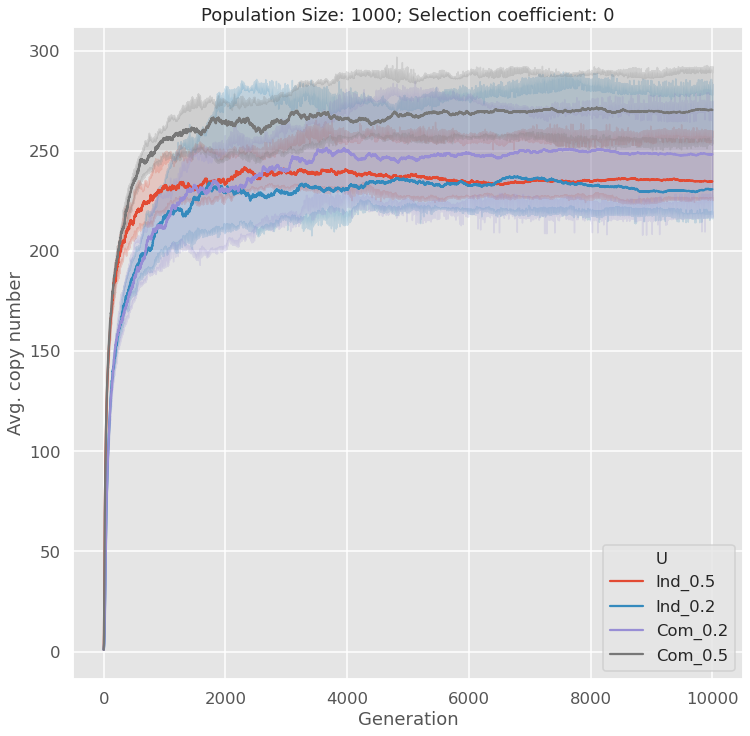

In [25]:
# Plot the average copy number
plt.figure(figsize=(12, 12))
f = sns.lineplot(
    x='Generation', y='AverageCN', hue="U", estimator=np.median, data=masterDF,
).set_title(
    "Population Size: 1000; Selection coefficient: 0"
)
plt.ylabel('Avg. copy number', fontsize=18)
plt.xlabel('Generation', fontsize=18)

Text(0.5, 0, 'Generation')

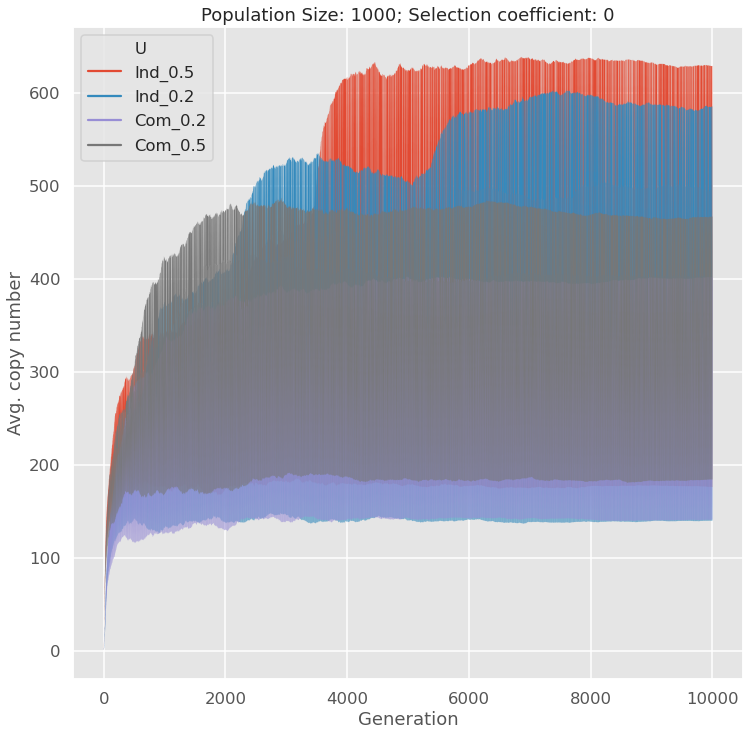

In [15]:
# Plot the average copy number
plt.figure(figsize=(12, 12))
f = sns.lineplot(
    x='Generation', y='AverageCN', hue="U", estimator=None, lw=0.05, data=masterDF,ci=False
).set_title(
    "Population Size: 1000; Selection coefficient: 0"
)
plt.ylabel('Avg. copy number', fontsize=18)
plt.xlabel('Generation', fontsize=18)

In [ ]:
alt.data_transformers.disable_max_rows()
# The basic line
line = alt.Chart(masterDF).mark_line(interpolate='basis').encode(
    x='Generation:Q',
    y='AverageCN:Q',
    color='U:N'
)
line

In [ ]:
# Plot the average copy number
plt.figure(figsize=(12, 12))
f = sns.lineplot(
    x='Generation', y='AverageCN', hue="U", data=masterDF, ci=None
).set_title(
    "Population Size: 1000; Selection coefficient: 0"
)
plt.ylabel('Avg. copy number', fontsize=18)
plt.xlabel('Generation', fontsize=18)

In [ ]:
# Plot the average copy number
plt.figure(figsize=(12, 12))
for i in result_0205:
    f = sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])), y=i["TEfamilyCN"][2], color="grey",
    ).set_title(
        "Population Size: 1000; Selection coefficient: 0"
    )
plt.ylabel('Avg. copy number', fontsize=18)
plt.xlabel('Generation', fontsize=18)

In [ ]:
# Plot the average copy number
plt.figure(figsize=(12, 12))
for i in result_05:
    f = sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])), y=i["AvgCopyNum"], color="grey",
    ).set_title(
        "Population Size: 1000; Selection coefficient: 0"
    )
plt.ylabel('Avg. copy number', fontsize=18)
plt.xlabel('Generation', fontsize=18)

Text(0.05, 0.5, 'Avg. copy number')

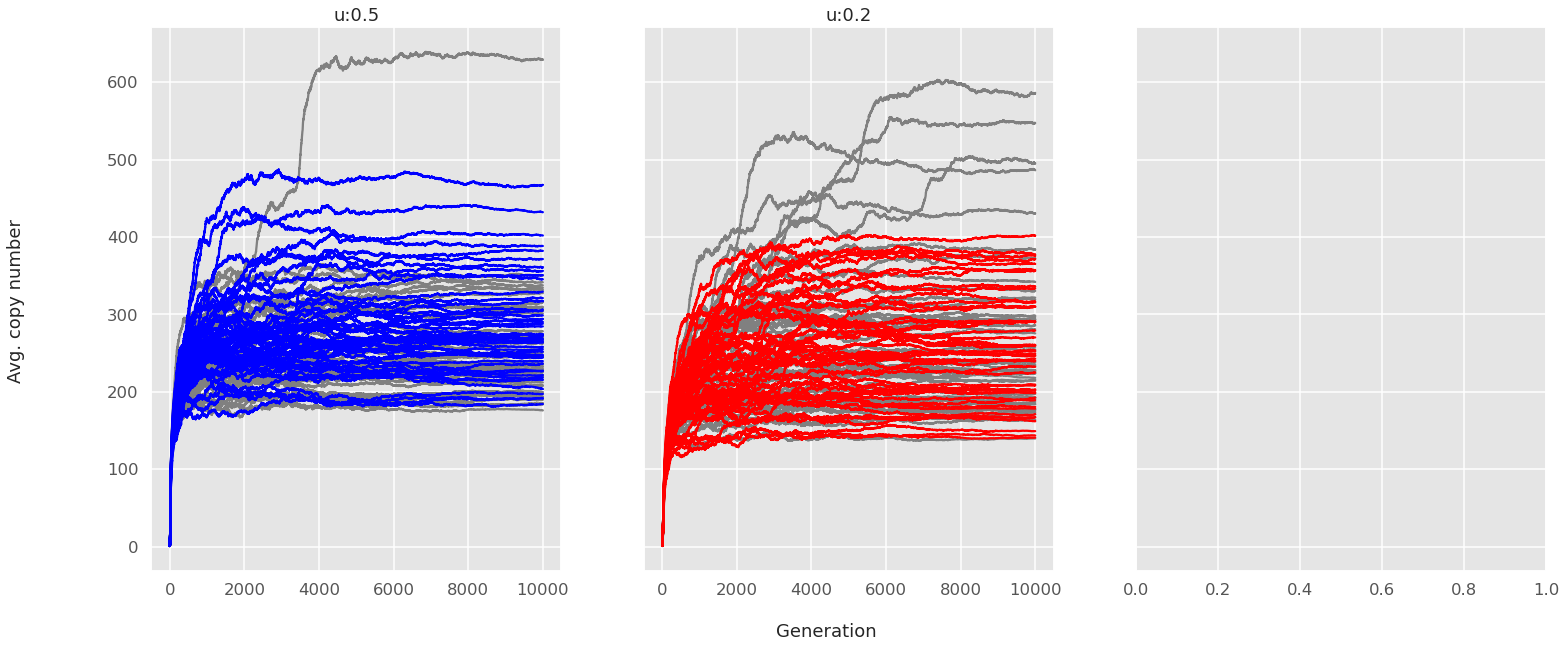

In [21]:
# Set up the figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(25, 10),)
# Plot the average copy number
for i in result_05:
    f = sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=np.asarray(i["AvgCopyNum"]),
        color="grey",
        ax=ax1,
    ).set_title("u:0.5")
# Plot the average copy number
for i in result_0205:
    sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=i["TEfamilyCN"][2],
        color="blue",
        ax=ax1,
    ).set_title("u:0.5")

    fig = ax1.figure
# Plot the average copy number
for i in result_02:
    f = sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=np.asarray(i["AvgCopyNum"]),
        color="grey",
        ax=ax2,
    ).set_title("u:0.2")
# Plot the average copy number
for i in result_0205:
    sns.lineplot(
        x=np.arange(len(i["AvgCopyNum"])),
        y=i["TEfamilyCN"][1],
        color="red",
        ax=ax2,
    ).set_title("u:0.2")

    #fig = ax1.figure
fig.text(0.5, 0.04, "Generation", ha="center", va="center", size=18)
fig.text(
    0.05,
    0.5,
    "Avg. copy number",
    ha="center",
    va="center",
    rotation=90,
    size=18,
)